In [ ]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


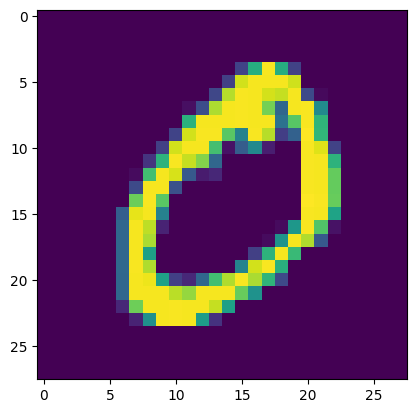

In [ ]:
plt.imshow(X_train[1])

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2] #28 * 28

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') #reshaping X_train to (60000, 784)
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') #reshaping X_train to (10000, 784)

In [ ]:
X_train = X_train / 255 #normalization
X_test = X_test/ 255

In [ ]:
#one hot encoding
y_train = to_categorical(y_train) #changing y_train to classes 0 - 9
y_test = to_categorical(y_test)   #changing y_test to classes 0 - 9

#y_train shape - (60000, 10); y_test shape - (10000, 10)
num_classes = y_train.shape[1] #
num_classes

10

In [ ]:
def classification_model():

    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9439 - loss: 0.1844 - val_accuracy: 0.9676 - val_loss: 0.1079
Epoch 2/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9757 - loss: 0.0774 - val_accuracy: 0.9769 - val_loss: 0.0753
Epoch 3/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9834 - loss: 0.0535 - val_accuracy: 0.9770 - val_loss: 0.0793
Epoch 4/10
1875/1875 - 17s - 9ms/step - accuracy: 0.9869 - loss: 0.0384 - val_accuracy: 0.9784 - val_loss: 0.0751
Epoch 5/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9898 - loss: 0.0324 - val_accuracy: 0.9817 - val_loss: 0.0673
Epoch 6/10
1875/1875 - 20s - 10ms/step - accuracy: 0.9920 - loss: 0.0258 - val_accuracy: 0.9817 - val_loss: 0.0747
Epoch 7/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9925 - loss: 0.0227 - val_accuracy: 0.9778 - val_loss: 0.0868
Epoch 8/10
1875/1875 - 20s - 11ms/step - accuracy: 0.9931 - loss: 0.0214 - val_accuracy: 0.9778 - val_loss: 0.0949
Epoch 9/10
1875/1875 - 20s - 11ms/step - accuracy: 0.9947 - loss: 0.0160 - val_ac

In [ ]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))

Accuracy: 0.9843999743461609% 
 Error: 0.015600025653839111


In [ ]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
import numpy as np

predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes[:20])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 8 4]


In [ ]:
actual_classes = np.argmax(y_test, axis=1)  # If y_test is one-hot encoded

# Show predictions vs actuals for first 10 samples
for i in range(20):
    print(f"Predicted: {predicted_classes[i]}, Actual: {actual_classes[i]}")

Predicted: 7, Actual: 7
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 4, Actual: 4
Predicted: 1, Actual: 1
Predicted: 4, Actual: 4
Predicted: 9, Actual: 9
Predicted: 5, Actual: 5
Predicted: 9, Actual: 9
Predicted: 0, Actual: 0
Predicted: 6, Actual: 6
Predicted: 9, Actual: 9
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 5, Actual: 5
Predicted: 9, Actual: 9
Predicted: 7, Actual: 7
Predicted: 8, Actual: 3
Predicted: 4, Actual: 4


In [ ]:
model.save('mnist_model_9952.h5')